In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from keras.utils import np_utils

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [2]:
# Helper to plot loss
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.grid(True)

# Keras, TensorFlow, and Neural Network Regression

As we have seen, neural networks aren't quite as complex as they appear at first, however we still generally don't want to have to build them from scratch very often. The libraries that we will primarily use for creating neural network models are Tensorflow and Keras. Keras and Tensorflow combine to be roughly what sklearn was for the other types of models we've used. 

### Tensorflow

Tensorflow, developed by Google, is one of the most popular libraries for neural networks. 

### Keras

Keras is another package that provides an an API offering an easier to use interface to Tensorflow, allowing us to use it with code that is higher level, avoiding much of the linear math that can make Tensorflow frustrating. Since its introduction Keras has been wrapped in with Tensorflow and the two are normally now blended together as far as we are concerned. 

### Other Alternatives

Keras and Tensorflow are not the only libraries of neural networks, the primary competitor to Tensorflow is PyTorch, which was developed by Facebook. PyTorch does pretty much the same thing as Tensorflow, we won't look at it. While PyTorch is less commonly used than Tensorflow right now, it has picked up steam recently. There's a pretty high likelihood that both Tensorflow and PyTorch will be common for the foreseeable future.

### Optimization and Efficiency Notes

Neural networks are very computationally expensive, and can take a long time to train. As we move into looking at some larger models in the near future, the processing time on a typical laptop will become prohibitive. We will utilize Google Colab for some of these examples, which will allow us to borrow some GPU processing that is often drastically faster than what we can get on our own machines.

If you happen to have a machine with a nVidia GPU, an M1/M2 Mac, or potentially a couple of other GPUs, you can install an optimized version of Tensorflow on your machine that will allow this stuff to use your GPU and be way faster without using Colab. This isn't required, but it is a good idea if your computer is capable. I don't have a GPU, so I don't have a detailed example, but you can google "install tensorflow GPU/M1 Mac" or similar for your GPU and there will be some pretty simple step-by-step instructions. If available, this will make a big difference in the speed of your models. 

# Keras、TensorFlow 和神經網絡回歸

正如我們所見，神經網絡並不像最初看起來那麼複雜，但我們通常仍然不想經常從頭開始構建它們。 

我們將主要用於創建神經網絡模型的庫是 Tensorflow 和 Keras。 Keras 和 Tensorflow 的結合大致相當於 sklearn 對我們使用過的其他類型模型的作用。

### TensorFlow

由 GOOGLE 開發的 Tensorflow 是最受歡迎的神經網絡庫之一。

### Keras

Keras 是另一個提供 API 的軟件包，它提供了一個更易於使用的 Tensorflow 接口，

允許我們將它與更高級別的代碼一起使用，避免了很多會使 Tensorflow 令人沮喪的線性數學。 

自推出以來，Keras 就與 TensorFlow 結合在一起，就我們而言，現在通常將兩者混合在一起。

### 其他選擇

Keras 和 Tensorflow 並不是唯一的神經網絡庫，Tensorflow 的主要競爭對手是 Facebook 開發的 PyTorch。

PyTorch 做的事情和 TensorFlow 差不多，我們就不看了。 

雖然 PyTorch 現在不如 TensorFlow 常用，但它最近開始流行起來。 

在可預見的未來，Tensorflow 和 PyTorch 很可能會通用。

### 優化和效率說明

神經網絡在計算上非常昂貴，並且可能需要很長時間才能訓練。 

隨著我們在不久的將來著眼於一些更大的型號，典型筆記本電腦的處理時間將變得令人望而卻步。

我們將利用 Google Colab 來處理其中一些示例，這將使我們能夠借用一些 GPU 處理，

這些處理通常比我們在自己的機器上獲得的處理速度快得多。

如果你碰巧有一台帶有 nVidia GPU、M1/M2 Mac 或可能有幾個其他 GPU 的機器，

## Remote Data and Google Colab

Below we'll load some data, however here we'll load something from a data repository that I setup on Azure, rather than the desktop, as we normally would. This is easy to do, we just change the path to the URL and use our "read_csv" as usual. The reason for this is that we are going to use Google Colab for some of the processing here, and if we are loading data from some static location, like this server address, we don't need to worry about loading data files and maintaining file paths. This will likely be something that you need to at least pay some attention to if you are using Colab. The key thing to remember is that it doesn't matter where the data is stored, as long as you can get to it. So if we need to change the data to make things work, we may have to change the loading bit to make it work. 

#### Your Remote Data

If you have a large-ish dataset that you're using, you can do the same thing. The datasets can be loaded directly from your github repository URL, as long as you get the "Raw" URL from Github. Click on the raw link on a file, then use the URL of the resulting page:

![Raw Link](images/github_raw.png "Raw Link")

Then you can use that URL to load the data. If you have data that comes from some site on the internet, you can likely load it similarly, assuming there's no security on the site blocking you from loading it. If there's something that doesn't work in any reasonable way, let me know, we might be able to put it on this Azure repository. I can't promise that in every situation though, it isn't free - though Azure, AWS, and Google Cloud all have free access of various levels that you could sign up for and use, if you wanted to. You can also save stuff to your Google Drive, and then load it from there - Google instructions if you need to do this. 

### Google Colab

As noted, we'll use Colab for some of our neural network stuff, as it gives us GPU access, which is massively helpful in many situations. The URL for Colab is https://colab.research.google.com/ and you can sign in with your Google account. Once on Colab, it works pretty much like Jupyter notebooks. To load data from Github, we can go to File->Open Notebook->Github, and then paste in the URL of the repository we want to load and select the notebook. Once loaded, it is basically a normal notebook. The one thing to pay attention to is that if there are any file loading bits in the code, those will fail, as noted above. 

Inside of Colab, the one key thing we want is to enable GPU accelleration. To do this, go to Edit->Notebook Settings, and then select GPU as the hardware accelerator. This will make a big difference in the speed of your models when using tensorflow. One thing to note is that while we get a bunch of GPU time for free, it is limited. So it is probably a waste to run huge tests with massive numbers of epochs, over and over, as you will likely run out of GPU time at some point. It will reset, but how much is allocated to each person is basically up to the whims of Google at any given moment. The "!" command below will print the details on the GPU that is currently being used.

I prefer to do all the editing in VS Code, save, upload to Github, then load and run the final code in a Colab window. This is more personal prefence than anything else, but it works well for me. You can also edit and save things in Colab, including back to Github, but you will likely need to do some authorization to allow access, and the process feels more annoying to me. For ease, I added this parameter to set the epochs globally for this notebook, so I can set it to a low number while working locally, then increase it when I want to test the actual performance on Colab. We could do a similar thing with sampling large datasets. 

In [3]:
BASE_EPOCHS = 100
!nvidia-smi -L

'nvidia-smi' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


In [4]:
#df = pd.read_csv("data/house_data.csv")
df = pd.read_csv("https://jrssbcrsefilesnait.blob.core.windows.net/3950data1/house_data.csv")
df.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [6]:
y = np.array(df["price"]).reshape(-1,1)
X = np.array(df.drop(columns={"price"}))
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)

(21613, 18) (21613, 1)


## Create Model

Creating a NN model is slightly different from the normal process that we are used to in sklearn. We need to do a little more work to set it up. 

### Create Model and Add Layers

First we need to make a NN model, it comes "empty". We will use a sequential model, which is the most simple type but is less configurable (which we don't care about much right now). The limitation of sequential models is that they can only take in one tensor and only output one tensor. The other options here are "functional", which allows for the structure of the model to be configured, and "model subclassing", which allows you to build almost everything from scratch. These other types are more complex and more flexible, but actually aren't really needed for most applications, and we won't use them. These more complex models are commonly used for scenarios where the data is complex, such as a self driving car - a model needs to output steering as well as velocity. Also for more complex problems such as language or image processing, this flexibility allows for models to be created that are better able to extract the information from the data.

#### Layers

Next we need to add some layers. We will start simple with only two "thinking" layers, and one to do some processing. We can think of the layers roughly like steps of the sklearn pipeline, with data entering at the first layer and predictions flowing out of the final layer. 

In addition to "normal" neural network layers, there are many other types that can do all kinds of other stuff. One example we will use here is the normalization one at the front. This layer does exactly what you'd expect - it normalizes our data so the rest of the network can use it. The normalize layer will also automatically handle the 2D nature of the data that we are used to, so we don't need to worry about that aspect here. Other layers can do everything from regularization to image processing, they are also commonly inhierited for developers to create custom layers targeting specific tasks. We'll use a few of the other ones as we move through some more complex models.

![Keras Layers](images/keras_layers.jpg "Keras Layers")

#### Dense Layers

We'll use dense layers here, and they are the main building block in our models. When adding the layer we need to specify a couple of things. One is the input dimensions - we need to tell the network what the shape of the incomming data is. 

The other argument is the units, which represents the output dimension. When using these Keras dense layers we don't need to specify each layer's input/output like we did when we made it by hand. We specify both, using units and input_dim, for the first layer that takes in the input; for subsequent layers we can just specify the output and Keras will automatically figure the rest out. 

Note that there is also an input layer that can be added, we can avoid the need for it by using the input_dim or input_shape as shown below. The two examples there do the same thing, since the input is flat - 18 features. If we are dealing with inputs that do not start out as flat, such as in an image, use the input_shape since you can specify all dimensions; we will see an example of this next time with some images. 

#### Activation Function

For each of our layers we need to define which activation function to use. For now we will use the ReLU function, which is probably the most popular. We'll look at other ones later on. Note that we've left the activation function off of the final layer - we are doing regression so we want that raw value. This is the same idea as with linear regression - we don't want the prediction to be transformed through something like the sigmoid, we just want the number.

#### Summary

After we've constructed the model, the summary command give us, well, a summary. 

### 創建模型並添加圖層

首先我們需要製作一個 NN 模型，它是“空的”。 

我們將使用順序模型，這是最簡單的類型，但可配置性較低（我們現在不太關心）。 

順序模型的局限性在於它們只能接受一個張量並且只能輸出一個張量。 

這裡的其他選項是“功能性”，它允許配置模型的結構，以及“模型子類化”，它允許您從頭開始構建幾乎所有東西。 

這些其他類型更複雜、更靈活，但實際上對於大多數應用程序來說並不是真正需要的，我們不會使用它們。 

這些更複雜的模型通常用於數據複雜的場景，例如自動駕駛汽車——模型需要輸出轉向和速度。 

此外，對於語言或圖像處理等更複雜的問題，這種靈活性允許創建能夠更好地從數據中提取信息的模型。

#### layers

接下來我們需要添加一些圖層。 我們將從簡單的兩個“思考”層開始，一個做一些處理。 

我們可以將這些層大致視為 sklearn 管道的步驟，數據從第一層進入，預測從最後一層流出。

除了“普通”神經網絡層之外，還有許多其他類型可以做各種其他事情。 

我們將在此處使用的一個示例是前面的規範化示例。 

該層完全符合您的預期——它規範化了我們的數據，以便網絡的其餘部分可以使用它。 

歸一化層也會自動處理我們習慣的數據的二維性質，所以我們在這裡不需要擔心這方面的問題。 

其他層可以做從正則化到圖像處理的所有事情，它們也通常被繼承以供開發人員創建針對特定任務的自定義層。 

當我們瀏覽一些更複雜的模型時，我們將使用其他一些模型。

#### 密集層 dense layers

我們將在這裡使用密集層，它們是我們模型中的主要構建塊。 添加圖層時，我們需要指定幾件事。 

一個是輸入維度——我們需要告訴網絡輸入數據的形狀是什麼。

另一個參數是單位，代表輸出維度。使用這些 Keras 密集層時，我們不需要像手工製作時那樣指定每個層的輸入/輸出。

我們使用 units 和 input_dim 為接收輸入的第一層指定兩者； 

對於後續層，我們只需指定輸出，Keras 會自動計算出其餘部分。

請注意，還有一個可以添加的輸入層，我們可以通過使用 input_dim 或 input_shape 來避免需要它，如下所示。 

那裡的兩個例子做同樣的事情，因為輸入是平坦的——18 個特徵。 

如果我們處理的輸入不是一開始就平坦的，例如圖像，請使用 input_shape，因為您可以指定所有維度； 

下次我們將看到一些圖像的例子。

#### 激活函數

對於我們的每一層，我們都需要定義要使用的激活函數。 現在我們將使用 ReLU 函數，它可能是最流行的。 

稍後我們會看看其他的。 請注意，我們已將激活函數留在最後一層 - 我們正在進行回歸，因此我們需要原始值。 

這與線性回歸的想法相同——我們不希望預測通過 sigmoid 之類的東西進行轉換，我們只需要數字。

We are dealing with a bunch of numerical inputs here, so we can add a normalization layer at the front end. Like with sklearn, we want to fit the normalization to the training data only. 

In [7]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

model = Sequential()
model.add(normalizer)
model.add(Dense(18, input_shape=(18,), activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 18)               37        
 n)                                                              
                                                                 
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 1)                 19        
                                                                 
Total params: 398
Trainable params: 361
Non-trainable params: 37
_________________________________________________________________


#### Compile Model

Once a model is created we need to compile it. The complie step basically builds the layers we specified above and the loss and optimization parameters below together into a usable model object. When compiling the model we are providing it with the things it needs to calculate error:

<ul>
<li> Loss - we can provide a loss function that we'd like to use. 
<li> Optimizer - the optimizer is the algorithm that the model will use to perform the gradient descent to find the lowest error. Adam is a very common choice.
<li> Learning rate - the learning rate is provided as a parameter of the optimizer. 
</ul>

##### Optimizing Adam

The optimizer is the algorithm used to perform the gradient descent and minimize error. For the most part this isn't something we need to be concerned about. The choice of optimizer is much more important if dealing with very large datasets because different optimizers have different levels of efficiency. For our purposes, we can use Adam and be pretty happy. Adam stands for Adaptive Moment Estimation which means basically that it will adjust itself depending on current gradients. It tends to be efficient both in time and memory, so it is very commonly used. 

<b>Note:</b> it is pretty common in tensorflow and keras to have things like the example below, where we can specify "adam" with either the name, or the full class with arguments. These different ways of doing things are generally interchangable, but it does make documentation more confusing, as the two different ways may often be interchanged. 

#### 編譯模型 compile model

創建模型後，我們需要對其進行編譯。 

編譯步驟基本上將我們上面指定的層和下面的損失和優化參數一起構建成一個可用的模型對象。 

在編譯模型時，我們為它提供了計算誤差所需的東西：

<ul>
<li> 損失 loss - 我們可以提供我們想要使用的損失函數。
<li> 優化器 optimizer - 優化器是模型將用來執行梯度下降以找到最低誤差的算法。 Adam 是一個很常見的選擇。
<li> 學習率 learning rate - 學習率作為優化器的參數提供。
</ul>

##### 優化亞當 Optimizing Adam

優化器是用於執行梯度下降和最小化誤差的算法。 

如果處理非常大的數據集，優化器的選擇就更為重要，因為不同的優化器具有不同的效率級別。 

出於我們的目的，我們可以使用 Adam 並且非常開心。 

Adam 代表 Adaptive Moment Estimation，這基本上意味著它會根據當前梯度進行自我調整。 

它往往在時間和內存方面都很高效，因此非常常用。

<b>注意：</b> 在 tensorflow 和 keras 中，類似下面示例的東西很常見，我們可以在其中使用名稱或帶參數的完整類指定“adam”。 

這些不同的做事方式通常可以互換，但它確實使文檔更加混亂，因為這兩種不同的方式可能經常互換。

In [8]:
#model.compile(loss='mean_absolute_error', optimizer="adam")
model.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=.01))

### Fit the Model

The fit command does the same thing that we are used to, it trains the model, however there are some differences. The main difference is that batch_size is almost always set in neural networks, while the sklearn models just take all the data at once. 

What's a batch? Batches are just subsets of the data, so if the batch size is 100 the algorithm will grab 100 rows at a time before making an update to the weights and bias. There are a few reasons this exists:

<ul>
<li> Memory constraints - it is common with neural networks to deal with datasets that are extremely large. Processing data that can't fit entirely in RAM is very slow (the computer must swap data from the hard drive to RAM as it is needed) compared to data that is in RAM. Cutting the batch size can avoid this issue. 
<li> Speed - the math involved in the back propagation can sometimes be very computationally intensive. 
<li> Accuracy - batch size can have an impact on accuracy, though that impact is not very predictable. For the most part finding an optimal batch size will need to be grid-searched. 
</ul>

The fit command also has the epoch paramater, which instructs on how many times to work through ALL of the data. We want to ensure we have enough epochs to find the optimal solution. Training rounds, or epochs, are one of the key tuning factors when using neural networks. Similar to large trees, large neural networks are capable of learning the training data very well, and carry the same risk of overfitting. With neural networks, a common approach to tuning is to allow the model to train, and cut it off when we start overfitting, or when the testing accuracy starts to decrease.

#### Plot the Loss

One very common visualization we see with neural networks is a plot of both training and validation loss vs number of epochs. Generally we'll see the training loss drop - first sharply as the model initially fits itself, then more slowly as it becomes more fitted. The validation loss will usually somewhat mirror the training loss, except it will often reach a minimum at some point before again increasing. This minimum point is our best model, when the validation loss starts increasing again, that is a sign that the model has become overfitted - customized to the training data, but less and less generalizable to new data. 

Set the verbosity to 1 in the fit to get a full list of the loss for each epoch to pinpoint the exact "ideal" number of epochs. We'll look more at this in a minute. 

### 擬合模型

fit 命令做的事情和我們習慣的一樣，它訓練模型，但是有一些不同。 

主要區別在於 batch_size 幾乎總是在神經網絡中設置，而 sklearn 模型只是一次獲取所有數據。

什麼是批次？ 批次只是數據的子集，因此如果批次大小為 100，算法將在更新權重和偏差之前一次獲取 100 行。 

存在這種情況有幾個原因：

<ul>
<li> 內存限制 - 神經網絡處理非常大的數據集很常見。 

與 RAM 中的數據相比，處理不能完全放入 RAM 中的數據非常慢（計算機必鬚根據需要將數據從硬盤驅動器交換到 RAM 中）。 

減少批量大小可以避免這個問題。
<li> 速度 - 反向傳播中涉及的數學有時可能需要大量計算。
<li> 準確性 - 批量大小會對準確性產生影響，儘管這種影響不是很容易預測。 

在大多數情況下，找到最佳批量大小需要進行網格搜索。
</ul>

fit 命令還有 epoch 參數，它指示遍歷所有數據的次數。 我們要確保我們有足夠的時間來找到最佳解決方案。 

訓練輪數或時期是使用神經網絡時的關鍵調整因素之一。 

與大樹類似，大型神經網絡能夠很好地學習訓練數據，並具有同樣的過度擬合風險。 

對於神經網絡，一種常見的調優方法是允許模型進行訓練，並在我們開始過度擬合或測試精度開始下降時將其切斷。

#### 繪製損失

我們在神經網絡中看到的一種非常常見的可視化是訓練和驗證損失與時期數的關係圖。 

通常我們會看到訓練損失下降——首先隨著模型最初適合自己而急劇下降，然後隨著它變得更適合而變慢。 

驗證損失通常會在某種程度上反映訓練損失，除了它通常會在再次增加之前的某個點達到最小值。 

這個最低點是我們最好的模型，當驗證損失再次開始增加時，這表明該模型已經變得過度擬合 - 

針對訓練數據進行了定制，但對新數據的泛化能力越來越差。

在擬合中將詳細程度設置為 1，以獲得每個時期的損失的完整列表，以查明確切的“理想”時期數。 

稍後我們將對此進行更多討論。

Epoch 1/100
130/130 [==============================] - 1s 2ms/step - loss: 540239.5000 - val_loss: 536096.5625
Epoch 2/100
130/130 [==============================] - 0s 1ms/step - loss: 539862.6250 - val_loss: 535456.1875
Epoch 3/100
130/130 [==============================] - 0s 1ms/step - loss: 538954.1875 - val_loss: 534283.7500
Epoch 4/100
130/130 [==============================] - 0s 1ms/step - loss: 537550.3750 - val_loss: 532640.5625
Epoch 5/100
130/130 [==============================] - 0s 1ms/step - loss: 535693.0625 - val_loss: 530556.3125
Epoch 6/100
130/130 [==============================] - 0s 1ms/step - loss: 533406.2500 - val_loss: 528058.4375
Epoch 7/100
130/130 [==============================] - 0s 1ms/step - loss: 530714.2500 - val_loss: 525157.3750
Epoch 8/100
130/130 [==============================] - 0s 1ms/step - loss: 527638.6875 - val_loss: 521878.6562
Epoch 9/100
130/130 [==============================] - 0s 1ms/step - loss: 524188.7812 - val_loss: 518242.2188
E

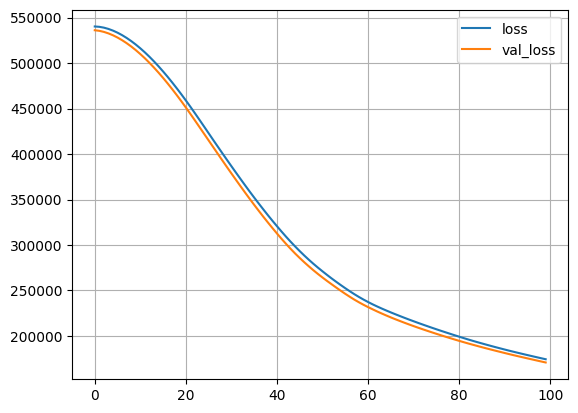

In [9]:
train_log = model.fit(X_train, y_train, epochs=BASE_EPOCHS, batch_size=BASE_EPOCHS, validation_split=.2, verbose=1)
model.evaluate(X_test, y_test)
plot_loss(train_log)

### Exercise

Make a simple neural network for predicting the price of homes in California. 

In [10]:
from sklearn.datasets import fetch_california_housing

cal = fetch_california_housing(as_frame=True)
Xcal = pd.DataFrame(cal.data)
ycal = pd.DataFrame(cal.target)
Xcal.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
ycal.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [12]:
X_train_cal,  X_test_cal, y_train_cal, y_test_cal = train_test_split(Xcal, ycal)
X_train_cal.shape

(15480, 8)

In [13]:
cal_normalizer = tf.keras.layers.Normalization(axis=-1)
cal_normalizer.adapt(np.array(X_train_cal))

cal_model = Sequential()
cal_model.add(cal_normalizer)
cal_model.add(Dense(8, input_shape=(8,), activation='relu'))
cal_model.add(Dense(8, activation='relu'))
cal_model.add(Dense(1))
cal_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 170
Trainable params: 153
Non-trainable params: 17
_________________________________________________________________


Epoch 1/100
248/248 [==============================] - 1s 1ms/step - loss: 2.4346 - val_loss: 1.0215
Epoch 2/100
248/248 [==============================] - 0s 981us/step - loss: 1.0052 - val_loss: 0.7002
Epoch 3/100
248/248 [==============================] - 0s 971us/step - loss: 0.7345 - val_loss: 0.5790
Epoch 4/100
248/248 [==============================] - 0s 932us/step - loss: 0.5887 - val_loss: 0.4988
Epoch 5/100
248/248 [==============================] - 0s 998us/step - loss: 0.5050 - val_loss: 0.4553
Epoch 6/100
248/248 [==============================] - 0s 981us/step - loss: 0.4622 - val_loss: 0.4324
Epoch 7/100
248/248 [==============================] - 0s 997us/step - loss: 0.4408 - val_loss: 0.4216
Epoch 8/100
248/248 [==============================] - 0s 970us/step - loss: 0.4310 - val_loss: 0.4124
Epoch 9/100
248/248 [==============================] - 0s 959us/step - loss: 0.4217 - val_loss: 0.4068
Epoch 10/100
248/248 [==============================] - 0s 995us/step - los

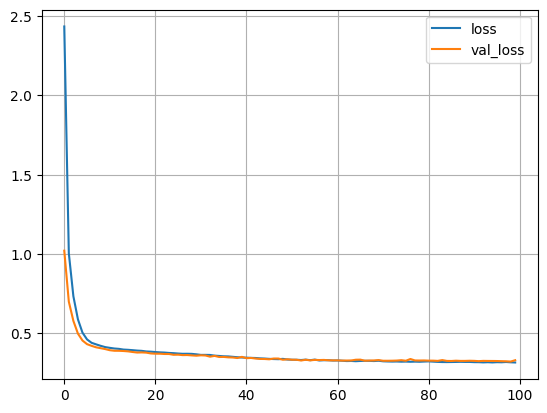

In [14]:
cal_model.compile(loss='mean_squared_error', optimizer=tf.optimizers.Adam())
cal_train_log = cal_model.fit(X_train_cal, y_train_cal, epochs=BASE_EPOCHS, batch_size=50, validation_split=.2, verbose=1)
cal_model.evaluate(X_test_cal, y_test_cal)
plot_loss(cal_train_log)

## Basics of Overfitting and Underfitting in Neural Networks

Just like any other type of model, our primary task in trying to attain an accurate set of predictions is to balance the overfitting and underfitting. In a neural network, the ideas are the same as with standard models, however the tools and their usage can differ slightly. 

### Add Data

Adding data to the training set is the number one way to improve accuracy. As noted above, neural networks are commonly able to acheive very high accuracy levels if provided with very large training sets. For smaller datasets, the probability of a neural network being the best model is much lower than with big data. There isn't a replacement for having large amounts of data (though there are a few tricks that we'll look at later), and modern large neural networks are (usually) the best tool that is able to take advantage of all that data. 

In the near future we'll look at some common pre-trained models that people/orgs such as Google have shared, most notably ones that do things like image recognition. These models are typically trained on really large datasets - often 10s of GB or more. This massive amount of training data allows these models to be more accurate than anything that we could create, but would be unrealistic for most people to train just due to the processing power and time needed. We can take them and adjust them a bit to our needs though...

<b>By far, the most universally beneficial way to make a neural network more accurate is to add more (good) data.</b>

### Model Capacity

The model capacity is the "size" of the model - refering to the combination of the number of neurons on each layer and the number of layers. In general the larger a feature set is, the larger a capacity we will need to be able to avoid underfitting and make accurate predictions. However, similar to a decision tree, if the model becomes too large for the data, we are likely to overfit. 

In big data scenarios (e.g. Google or Tesla training image recognition models) the feature sets can be massive (e.g. a 5 megapixel image is at least 15 million features) so the networks used have a very high capacity. Because there is a lot of training data, the model is able to have a huge capacity, but not overfit. These models can take FOREVER to process (e.g. weeks with the work paralellized on dedicated and fast machines) but they are able to make very accurate predictions since they get all the "benefits" of overfitting - predictions highly tailored to the training data; along with all the "benefits" of underfitting - since there is so much training data, they are still generalized enough to predict new data. There is something of an open question on if we should expand capacity by making the layers larger with more neurons, or by adding more layers. Like most things, the answer is whatever is tested to be best for the specific problem. In general though, more layers seems to be better for most problems, and the neural networks that excel at things such as image recognition tend to be deep learning networks - those with many layers. The combination of large datasets, deep networks, and fast processing allows for most of the modern AI that we see or interact with. 

<b>Note:</b> the size numbers that we specify as we add layers is the size of the output (other than the "input_dim" we have on the first layer). For other layers, the input of one just adapts to the output of the previous layer.

#### Capacities, For Now

We will look more at the model capacities in the next section, for now we can follow a few rough guidelines:
<ul>
<li> Input layer output size is between the # of features, and some multiple (maybe up to ~5 max) of the # of features. 
<li> Output layer is defined by the target we are predicting.  
<li> Hidden layers between the two either stay constant in size, or taper down. 
</ul>

We will look at this more next time. Unfortunately there isn't a definitive rule that always works, the ultimate decision is based on results. For now, we can just make some reasonable models and observe the results. 

## 神經網絡中過度擬合和欠擬合的基礎知識

就像任何其他類型的模型一樣，我們試圖獲得一組準確預測的主要任務是平衡過度擬合和欠擬合。 

在神經網絡中，思想與標準模型相同，但工具及其用法可能略有不同。

### 添加數據

向訓練集中添加數據是提高準確性的首要方法。 

如上所述，如果提供非常大的訓練集，神經網絡通常能夠達到非常高的準確度水平。 

對於較小的數據集，神經網絡成為最佳模型的概率遠低於大數據。 

擁有大量數據是無可替代的（儘管我們稍後會看到一些技巧），現代大型神經網絡（通常）是能夠利用所有數據的最佳工具 .

在不久的將來，我們將研究人們/組織（例如 Google）共享的一些常見的預訓練模型，其中最著名的是圖像識別等。 

這些模型通常是在非常大的數據集上訓練的——通常是 10 GB 或更多。 

如此大量的訓練數據使這些模型比我們可以創建的任何模型都更準確，但對於大多數人來說，

僅僅由於處理能力和所需的時間而進行訓練是不現實的。 我們可以接受它們並根據我們的需要稍微調整它們......

<b>到目前為止，使神經網絡更準確的最普遍有益的方法是添加更多（好的）數據。</b>

### 模型容量

模型容量是模型的“大小”——指的是每層神經元數量和層數的組合。

一般來說，特徵集越大，我們需要的容量就越大，才能避免欠擬合併做出準確的預測。 

然而，與決策樹類似，如果模型對於數據而言變得太大，我們很可能會過度擬合。

在大數據場景中（例如穀歌或特斯拉訓練圖像識別模型），

特徵集可能非常龐大（例如一張 5 兆像素的圖像至少有 1500 萬個特徵），因此所使用的網絡具有非常高的容量。 

因為有大量的訓練數據，所以模型能夠擁有巨大的容量，但不會過擬合。 

這些模型可能需要永遠處理（例如，在專用和快速機器上並行工作需要數週時間）但它們能夠做出非常準確的預測，

因為它們獲得了過度擬合的所有“好處”——針對訓練數據高度定制的預測； 

連同欠擬合的所有“好處”——由於訓練數據如此之多，它們仍然具有足夠的泛化能力來預測新數據。 

關於我們是否應該通過使用更多神經元使層更大或通過添加更多層來擴展容量，這是一個懸而未決的問題。 

像大多數事情一樣，答案是經過測試的最適合特定問題的答案。 

但總的來說，對於大多數問題來說，更多的層似乎更好，而擅長圖像識別等事情的神經網絡往往是深度學習網絡

——那些有很多層的網絡。 大型數據集、深度網絡和快速處理的結合使我們能夠看到或與之交互的大多數現代人工智能。

<b>注意：</b>我們在添加層時指定的大小數字是輸出的大小（第一層的“input_dim”除外）。 

對於其他層，一層的輸入只是適配上一層的輸出。

#### 能力，現在

我們將在下一節中更多地關注模型容量，現在我們可以遵循一些粗略的指導方針：
<ul>
<li> 輸入層輸出大小介於 # of features 和 # of features 之間（可能高達 ~5 max）。
<li> 輸出層由我們預測的目標定義。
<li> 兩者之間的隱藏層要么保持大小不變，要么逐漸變小。
</ul>

In [15]:
#Test Different Model Capacities
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

model = Sequential()
model.add(normalizer)
model.add(Dense(128, input_dim=18, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 18)               37        
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 128)               2432      
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                      

169/169 [==============================] - 0s 707us/step - loss: 70203.3359


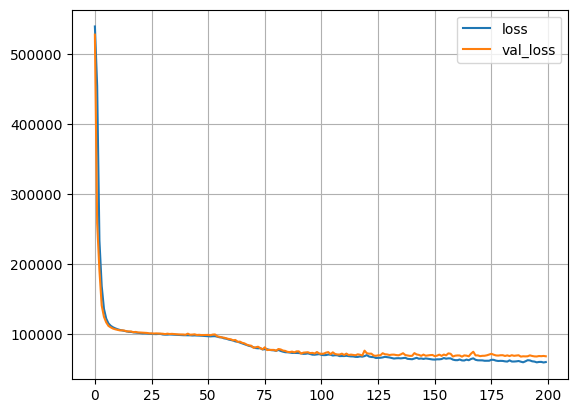

In [16]:
model.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=.01))
train_log = model.fit(X_train, y_train, epochs=BASE_EPOCHS*2, batch_size=1000, validation_split=.2, verbose=0)
model.evaluate(X_test, y_test)
plot_loss(train_log)

### Early Stopping

Early stopping is very common with neural networks, due to the common pattern mentioned above of the optimal balance of over/under fitting occuring at some point within many, potentially dozens/hundreds/thousands, of epochs. Early stopping kills the process after it detects that validation loss is going back up. 

We can put early stopping in place by using a Keras function called a callback, which has odd syntax, but is quite simple to use. The patience pararmeter controls how many epcohs of worsening scores are tolerated before implementing the stop. The restore_best_weights tells the model to roll back all of its weights to the optimal point - so we automatically get the best model post-training. In most cases we probabyl want to use early stopping along with a high epoch number. We can let the model train, and just tell us when it is finished. 

Another parameter that we may want to implement is the "min_delta" parameter. This controls how much the validation loss needs to improve to be considered an improvement. If the validation loss is 0.1, and the min_delta is 0.01, then the model will stop if the validation loss goes up to 0.11, but not if it goes up to 0.12. This is useful if we have a very small validation loss, and we want to make sure that we are getting a significant improvement before stopping. In situations like the above one, where the loss is flat-ish, but bumps around a little, this may help deal with that noise and make the early stopping cutoffs work more in line with expectations.

<b>Note:</b> the patience parameter requires a little bit of thought, and a good value can vary a little between scenarios. We want to make sure that we are not stopping too early, if the patience is really small, we might get a situation where a local minima is reached and we stop the model as it is trying to escape it. If the patience is too large, we might not stop the model in time, as we might have many flat loss values, then one or two that are an improvement, resetting the clock and making the training process keep going far too long. We need to base it somewhat on what the model actually does - very stable loss results might mean we need a higher patience, while a model that is very volatile might need a lower patience, as we might not have long stable periods anywhere. Values between 5 and 15 or so are common, as are settings of around 10% of the number of epochs, but it is a good idea to test a few different values to see what works best - if you actually work with larger examples we'll run several trials with different parameters or model configurations with samples of the full dataset. These trials will likely give us an idea of a reasonable cutoff point for patience. Many of the patience settings in examples that are in the next few workbooks are probably lower than "ideal", this is entirely for practicality purposes - we might be cutting off some slightly more ideal models, but we are also saving a lot of time.

### 提前停止

提前停止在神經網絡中很常見，這是由於上面提到的過度擬合/欠擬合的最佳平衡的常見模式發生在許多

可能是數十/數百/數千）時期內的某個點。 在檢測到驗證損失正在恢復後，提前停止會終止進程。

我們可以通過使用稱為回調的 Keras 函數來提前停止，它的語法很奇怪，但使用起來非常簡單。 

耐心參數控制在實施停止之前可以容忍多少惡化分數的 epcohs。 

restore_best_weights 告訴模型將其所有權重回滾到最佳點 - 因此我們會自動獲得訓練後的最佳模型。 

在大多數情況下，我們可能希望使用提前停止和高紀元數。 我們可以讓模型訓練，完成後告訴我們即可。

我們可能想要實現的另一個參數是“min_delta”參數。 這控制了驗證損失需要改進多少才能被視為改進。 

如果驗證損失為 0.1，並且 min_delta 為 0.01，則模型將在驗證損失上升到 0.11 時停止，

但在上升到 0.12 時不會停止。 如果我們的驗證損失非常小，並且我們想確保在停止之前得到顯著改進，這將很有用。 

在像上面這樣的情況下，損失是平坦的，但有點顛簸，這可能有助於處理這種噪音並使提前停止截止工作更符合預期。


<b>注意：</b> patience 參數需要稍微考慮一下，一個好的值在不同情況下可能會略有不同。 

我們要確保我們不會過早停止，如果耐心真的很小，我們可能會遇到達到局部最小值的情況，

我們會在模型試圖逃避時停止模型。 如果耐心太大，我們可能不會及時停止模型，

因為我們可能有很多平坦的損失值，然後一兩個是改進，重置時鐘並使訓練過程持續太久。 

我們需要在某種程度上基於模型的實際作用——非常穩定的損失結果可能意味著我們需要更高的耐心，

而非常不穩定的模型可能需要較低的耐心，因為我們可能在任何地方都沒有長期穩定的時期。 

5 到 15 左右的值很常見，大約 10% 的時期數設置也是如此，但測試幾個不同的值以查看最有效的值是個好主意

——如果您實際使用更大的示例，我們 您將使用完整數據集的樣本使用不同的參數或模型配置運行多個試驗。 

這些試驗可能會讓我們了解耐心的合理分界點。 

接下來幾本工作簿中示例中的許多耐心設置可能低於“理想”，

這完全是出於實用目的——我們可能會砍掉一些稍微更理想的模型，但我們也節省了很多時間。

In [17]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

model = Sequential()
model.add(normalizer)
model.add(Dense(18, input_dim=18, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(1))
#model.summary()

Epoch 1/300
260/260 [==============================] - 1s 1ms/step - loss: 371118.0000 - val_loss: 174262.6250
Epoch 2/300
260/260 [==============================] - 0s 1ms/step - loss: 140094.2812 - val_loss: 116822.8672
Epoch 3/300
260/260 [==============================] - 0s 1ms/step - loss: 113983.6484 - val_loss: 109163.5781
Epoch 4/300
260/260 [==============================] - 0s 1ms/step - loss: 109462.5781 - val_loss: 107100.2656
Epoch 5/300
260/260 [==============================] - 0s 1ms/step - loss: 107405.1406 - val_loss: 107265.3984
Epoch 6/300
260/260 [==============================] - 0s 1ms/step - loss: 106254.6172 - val_loss: 104647.1172
Epoch 7/300
260/260 [==============================] - 0s 1ms/step - loss: 105288.2344 - val_loss: 103747.4375
Epoch 8/300
260/260 [==============================] - 0s 1ms/step - loss: 104285.2109 - val_loss: 102961.3516
Epoch 9/300
260/260 [==============================] - 0s 1ms/step - loss: 103813.8516 - val_loss: 102696.1250
E

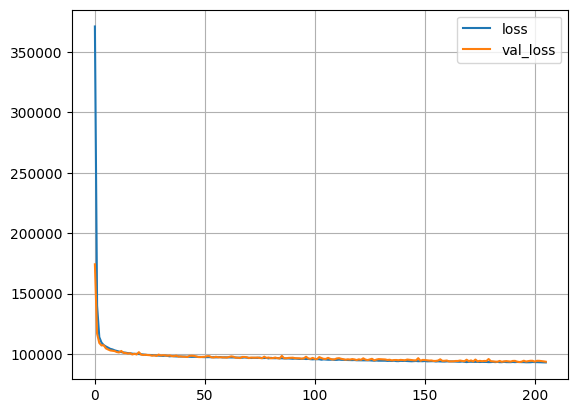

In [18]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50, restore_best_weights=True, min_delta=1000) 

model.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=.01))
train_log = model.fit(X_train, y_train, epochs=BASE_EPOCHS*3, batch_size=50, validation_split=.2, verbose=1, callbacks=[callback])
model.evaluate(X_test, y_test)
plot_loss(train_log)

### Validation

One change in the way we normally setup our data in neural networks is that we are performing checks during the training process with "validation data". This is another split of the data, like train-test, but this validation data is used during training to check the model's progress. This allows the model to constantly calculate the accuracy of the model on new data, similar to how things would work inside of a cross-validation in a grid search. The key thing that we can use this for is that it allows us to calculate the current "test data" performance, which is the "validation loss" that we can use to evaluate the model and cut short training. This validation dataset is normally "good enough" to be an indicator of the expected performance of the model, just like the test scores we are used to. We could still do a train-test split prior to training, and calcuate that true test accuracy, but we don't really need to. In most cases, what we referred to as test accuracy in sklearn models is just the validation accuracy in neural networks.

### Early Stopping on Validation Loss

More likely than stopping when the training loss starts to increase, we'll want to stop when the validation loss starts to increase. This is because the validation loss is a better indicator of how the model will perform on new data. This is also what allows us to set a high epoch number and walk away while training happens - as long as our model has "room to grow", or the capacity to fit the data, we can let it train until we've reached a minimum validation loss.

![Early Stopping](images/early_stopping.png "Early Stopping")

<b>Note:</b> early stopping on the validation loss will probably be the most common "optimization" that we'll do. 

＃＃＃ 驗證

我們通常在神經網絡中設置數據的方式的一個變化是，我們在訓練過程中使用“驗證數據”執行檢查。 

這是數據的另一個拆分，如訓練測試，但此驗證數據在訓練期間用於檢查模型的進度。 

這允許模型不斷計算模型對新數據的準確性，類似於網格搜索中交叉驗證內部的工作方式。 

我們可以使用它的關鍵是它允許我們計算當前的“測試數據”性能，這是我們可以用來評估模型和縮短訓練時間的“驗證損失”。 

這個驗證數據集通常“足夠好”，可以作為模型預期性能的指標，就像我們習慣的測試分數一樣。 

我們仍然可以在訓練之前進行訓練-測試拆分，併計算真實的測試準確度，但我們並不真的需要這樣做。 

在大多數情況下，我們所說的 sklearn 模型中的測試準確性只是神經網絡中的驗證準確性。

### 提前停止驗證損失

比起在訓練損失開始增加時停止，我們更希望在驗證損失開始增加時停止。 

這是因為驗證損失是模型將如何在新數據上執行的更好指標。 

這也是允許我們設置高紀元數並在訓練發生時走開的原因

——只要我們的模型有“增長空間”，或者有適應數據的能力，我們就可以讓它訓練直到我們達到 最小驗證損失。

<b>注意：</b>提前停止驗證損失可能是我們將做的最常見的“優化”。

Epoch 1/300
227/227 [==============================] - 1s 2ms/step - loss: 94098.1953 - val_loss: 94496.3750
Epoch 2/300
227/227 [==============================] - 0s 1ms/step - loss: 94080.4062 - val_loss: 93835.2031
Epoch 3/300
227/227 [==============================] - 0s 1ms/step - loss: 94039.9688 - val_loss: 94299.1094
Epoch 4/300
227/227 [==============================] - 0s 1ms/step - loss: 94135.6719 - val_loss: 94037.1719
Epoch 5/300
227/227 [==============================] - 0s 1ms/step - loss: 93963.9453 - val_loss: 93641.2656
Epoch 6/300
227/227 [==============================] - 0s 1ms/step - loss: 93796.5156 - val_loss: 94289.3281
Epoch 7/300
227/227 [==============================] - 0s 1ms/step - loss: 93850.0234 - val_loss: 93852.1094
Epoch 8/300
227/227 [==============================] - 0s 1ms/step - loss: 93822.4375 - val_loss: 95984.9141
Epoch 9/300
227/227 [==============================] - 0s 1ms/step - loss: 93690.0547 - val_loss: 93774.8281
Epoch 10/300
227/22

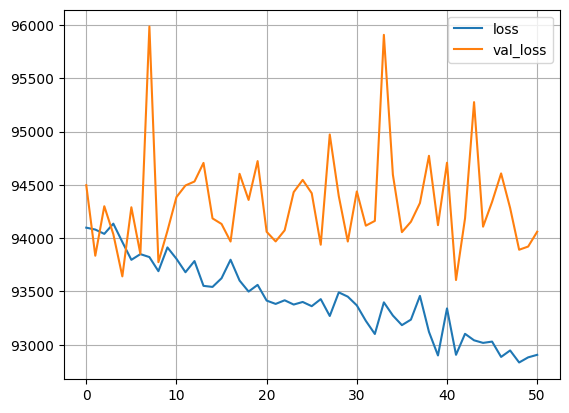

In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, min_delta=2000) 

model.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=.01))
train_log = model.fit(X_train, y_train, epochs=BASE_EPOCHS*3, batch_size=50, validation_split=.3, verbose=1, callbacks=[callback])
model.evaluate(X_test, y_test)
plot_loss(train_log)

### Regularization

Like other linear models, we can implement regularization to help tame overfitting. 

We can use both L2 (Ridge) regularization that will limit growth of coefficients, and L1 (Lasso) regularization that is able to eliminate features by shrinking their coefficients to 0. The functionality is the same as we are used to, a regularization term is added to the loss, and the optimization, such as gradient descent, is then performed as normal. 

In [20]:
# Regularization
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

model = Sequential()
model.add(normalizer)
model.add(Dense(128, input_dim=18, activation='relu'))
model.add(Dense(128, activation='relu', kernel_regularizer="l1"))
model.add(Dense(128, activation='relu', kernel_regularizer="l2"))
model.add(Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 18)               37        
 ion)                                                            
                                                                 
 dense_14 (Dense)            (None, 128)               2432      
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 35,622
Trainable params: 35,585
Non-trainable params: 37
_________________________________________________

169/169 [==============================] - 0s 2ms/step - loss: 70722.1797


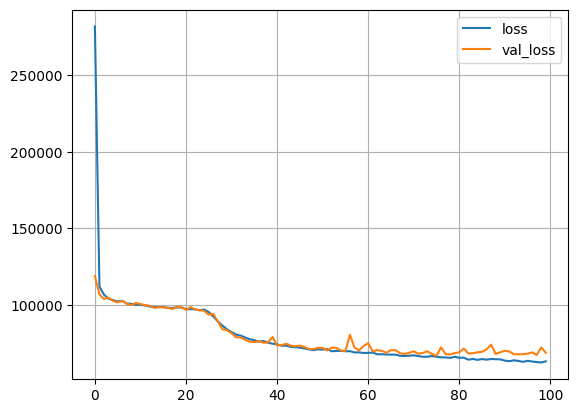

In [21]:
model.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=.01))
train_log = model.fit(X_train, y_train, epochs=BASE_EPOCHS, batch_size=100, validation_split=.2, verbose=0)
model.evaluate(X_test, y_test)
plot_loss(train_log)

### Dropout

Neural networks also commonly employ a technique call dropouts to prevent overfitting. This works just like the name says, every time the data is moved from one layer to another some portion of the features are randomly held out from being used. The intuitive explanation for dropout is that because individual nodes in the network cannot rely on the output of the others, each node must output features that are useful on their own. This sounds somewhat weird, but is actually effective. The number of features held out is called the dropout rate, typically between .2 and .5. 

![Dropout](images/dropout.webp "Dropout")

An analogy can be drawn to the bootstrapping we looked at with trees - some random subset is selected each time, resulting in each batch getting "a slightly different look at the data", thus preventing overfitting. 

＃＃＃ 輟學

神經網絡通常還採用一種叫做 dropouts 的技術來防止過度擬合。 

就像名字所說的那樣，每次將數據從一層移動到另一層時，都會隨機阻止使用某些功能。 

dropout 的直觀解釋是，由於網絡中的單個節點不能依賴其他節點的輸出，因此每個節點都必須輸出對自己有用的特徵。 

這聽起來有些奇怪，但實際上是有效的。 保留的特徵數量稱為丟失率，通常在 0.2 到 0.5 之間。

![Dropout](images/dropout.webp "Dropout")

可以類比我們用樹觀察的引導程序——每次都會選擇一些隨機子集，

導致每個批次“對數據的看法略有不同”，從而防止過度擬合。

In [22]:
# Dropout
#Test Different Model Capacities
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

model = Sequential()
model.add(normalizer)
model.add(Dense(512, input_dim=18, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 18)               37        
 ion)                                                            
                                                                 
 dense_18 (Dense)            (None, 512)               9728      
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                      

169/169 [==============================] - 1s 4ms/step - loss: 71728.8984


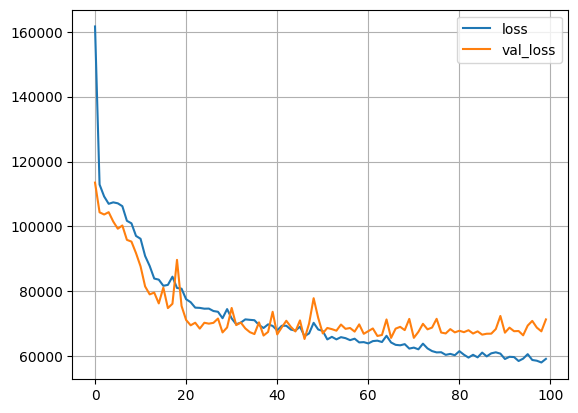

In [23]:
model.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=.01))
train_log = model.fit(X_train, y_train, epochs=BASE_EPOCHS, batch_size=100, validation_split=.2, verbose=0)
model.evaluate(X_test, y_test)
plot_loss(train_log)

### Predictions

Once the model is trained, using it is mostly familiar to us from the sklearn stuff. 

In [24]:
preds = model.predict(X_test)
mean_absolute_error(y_test, preds)


169/169 [==============================] - 1s 4ms/step


71728.90882187962

### Exercise

Use the California data from previously and try to add some regularization things.

In [25]:
print(X_train_cal.shape, y_train_cal.shape)

(15480, 8) (15480, 1)


I'll mix in a couple of regularization things, this could be almost anything. 

In [26]:
# Dropout
#Test Different Model Capacities
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train_cal))

model = Sequential()
model.add(normalizer)
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu', kernel_regularizer="l1"))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu', kernel_regularizer="l2"))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_23 (Dense)            (None, 8)                 72        
                                                                 
 dense_24 (Dense)            (None, 8)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_25 (Dense)            (None, 6)                 54        
                                                                 
 dense_26 (Dense)            (None, 4)                 28        
                                                      

162/162 [==============================] - 0s 826us/step - loss: 0.4857


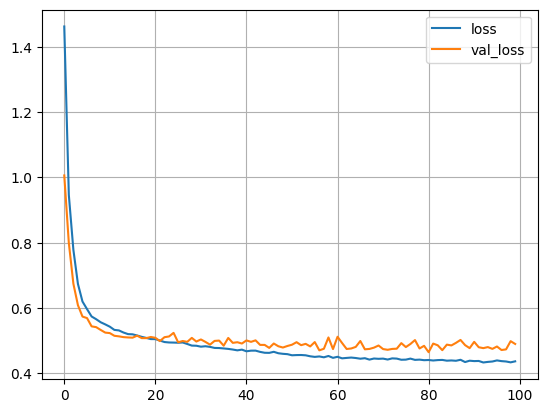

In [27]:

model.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=.001))
train_log = model.fit(X_train_cal, y_train_cal, epochs=BASE_EPOCHS, batch_size=70, validation_split=.3, verbose=0)
model.evaluate(X_test_cal, y_test_cal)
plot_loss(train_log)

### Customized Loss

Most scenarios are totally fine with a standard loss function, but what if we have something odd? What if we are playing on The Price is Right? We want to get as close as we can, without going over. We can write a loss function to mirror that! The Keras backend piece is basically a set of functions (like the "switch" we used, mean, sum, etc...) that are implemented in Tensorflow - they don't do anything differently from "normal" functions, but they are potentially more efficient.

More practically, some real life scenarios have a disperse impact of different types of error. For example, if you are working for a call centre and predicting the number of agents to staff. Having slightly too many may be an error that costs a little bit of money, but not that big of a deal. Predicting too few might incur serious penalties if callers wait and you violate an SLA. Being off in one direction is bad, being off in the other direction can cause you to "fall off of a cliff" so to speak. In cases where the impact of the error is not uniform, custom loss functions may make sense. 

<b>Note:</b> these custom loss functions work, but if you are going to put one into real use, you would likely want to look into ensuring the calculations are efficient and that you actually get a tangible benefit from the custom loss function. This one is kind of a goofy example, we will normally just want to use a standard loss function. Due to the wild differences if the residual is positive or negative, this one will likely yeild some pretty dramatic swings and variability. 

### 自定義損失

大多數情況下使用標準損失函數完全沒問題，但如果我們有一些奇怪的東西怎麼辦？ 

如果我們玩 The Price is Right 怎麼辦？ 我們希望盡可能靠近，但不要越過。 

我們可以寫一個損失函數來反映這一點！ 

Keras 後端部分基本上是一組在 Tensorflow 中實現的函數（比如我們使用的“開關”、均值、求和等）

——它們與“普通”函數沒有任何不同，但它們是 可能更有效率。

更實際的是，一些現實生活場景具有不同類型錯誤的分散影響。 

例如，如果您在呼叫中心工作並預測員工的座席人數。 稍微太多可能是一個錯誤，會花費一點錢，但沒什麼大不了的。

如果呼叫者等待並且您違反了 SLA，預測太少可能會招致嚴重的處罰。 

朝一個方向偏離是不好的，朝另一個方向偏離可能會導致你“從懸崖上掉下來”可以這麼說。 

在錯誤影響不均勻的情況下，自定義損失函數可能有意義。

<b>注意：</b>這些自定義損失函數有效，但如果您要將其中一個投入實際使用，

您可能需要考慮確保計算高效並且您確實從自定義損失函數中獲得了實實在在的好處損失函數。 

這是一個愚蠢的例子，我們通常只想使用標準損失函數。 

由於殘差是正還是負的巨大差異，這個可能會產生一些非常戲劇性的波動和可變性。

## Optional Exercise

Try to use the California data with a customized loss function. 

Note: this is a 20 way classification, so you'll probably want that many neurons on the output layer, an appropriate activation (softmax), and the y values will need to be run through np_utils.to_categorical. As well, think about the loss function, try categorical crossentropy.

We'll look at activation and loss functions more next week. 

In [28]:
import keras.backend as K

def priceIsRight(y_true, y_pred):
    return K.switch(
                    y_pred <= y_true, 
                    (y_true - y_pred) ** 2,
                    (y_true - y_pred) ** 4
                    )

Epoch 1/100
37/37 [==============================] - 1s 7ms/step - loss: 0.4389 - val_loss: 0.4846
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3981 - val_loss: 0.4838
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3878 - val_loss: 0.4597
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4174 - val_loss: 0.4735
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4088 - val_loss: 0.4879
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3931 - val_loss: 0.4708
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3853 - val_loss: 0.4622
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3976 - val_loss: 0.4821
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3912 - val_loss: 0.4663
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3938 - val_loss: 0.4529
Epoch 11/

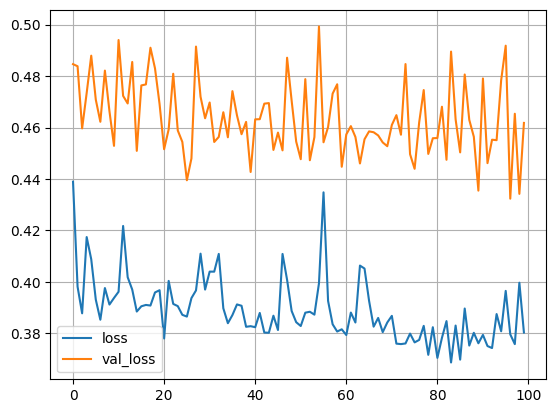

In [29]:
model.compile(loss=priceIsRight, optimizer=tf.optimizers.Adam(learning_rate=.001))
train_log = model.fit(X_train_cal, y_train_cal, epochs=BASE_EPOCHS, batch_size=300, validation_split=.3, verbose=1)
model.evaluate(X_test_cal, y_test_cal)
plot_loss(train_log)

## Big Exercise - Newsgroup Classification

Try to classify the newsgroup data. 

In [30]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

remove = ("headers", "footers", "quotes")

data_train = fetch_20newsgroups(
    subset="train", shuffle=True, remove=remove)

data_test = fetch_20newsgroups(
    subset="test", shuffle=True, remove=remove)

In [31]:
news_tf = TfidfVectorizer(sublinear_tf=True, ngram_range=(1,3), stop_words="english", strip_accents="unicode")
X_train = news_tf.fit_transform(data_train.data)
y_train = data_train.target
X_test = news_tf.transform(data_test.data)
y_test = data_test.target
print("Train:", X_train.shape, "  Test:", X_test.shape)

Train: (11314, 1971374)   Test: (7532, 1971374)


In [32]:
y_test = np_utils.to_categorical(y_test)
y_train = np_utils.to_categorical(y_train)

In [33]:
in_size = 200
tsvd = TruncatedSVD(n_components=in_size)
X_train = tsvd.fit_transform(X_train)
X_test = tsvd.transform(X_test)

In [34]:
model = Sequential()
model.add(Dense(in_size*3, input_dim=in_size, activation='relu'))
model.add(Dense(in_size*3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(in_size*3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(in_size*2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(in_size*2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(in_size, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(in_size, activation='relu'))
model.add(Dense(20, activation="softmax"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 600)               120600    
                                                                 
 dense_29 (Dense)            (None, 600)               360600    
                                                                 
 dropout_3 (Dropout)         (None, 600)               0         
                                                                 
 dense_30 (Dense)            (None, 600)               360600    
                                                                 
 dropout_4 (Dropout)         (None, 600)               0         
                                                                 
 dense_31 (Dense)            (None, 400)               240400    
                                                                 
 dropout_5 (Dropout)         (None, 400)              

Epoch 1/100
91/91 [==============================] - 4s 29ms/step - loss: 2.7678 - accuracy: 0.0990 - val_loss: 2.3703 - val_accuracy: 0.1732
Epoch 2/100
91/91 [==============================] - 3s 28ms/step - loss: 1.9533 - accuracy: 0.3214 - val_loss: 1.5740 - val_accuracy: 0.4587
Epoch 3/100
91/91 [==============================] - 3s 29ms/step - loss: 1.4870 - accuracy: 0.4999 - val_loss: 1.4839 - val_accuracy: 0.5254
Epoch 4/100
91/91 [==============================] - 3s 30ms/step - loss: 1.2720 - accuracy: 0.5932 - val_loss: 1.3381 - val_accuracy: 0.5784
Epoch 5/100
91/91 [==============================] - 3s 29ms/step - loss: 1.1209 - accuracy: 0.6455 - val_loss: 1.2618 - val_accuracy: 0.6178
Epoch 6/100
91/91 [==============================] - 3s 29ms/step - loss: 1.0007 - accuracy: 0.6896 - val_loss: 1.2810 - val_accuracy: 0.6430
Epoch 7/100
91/91 [==============================] - 3s 29ms/step - loss: 0.9134 - accuracy: 0.7182 - val_loss: 1.2225 - val_accuracy: 0.6416
Epoch 

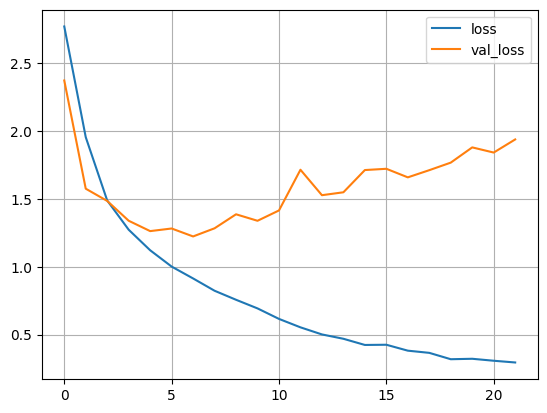

In [35]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True) 

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
train_log = model.fit(X_train, y_train, epochs=BASE_EPOCHS, batch_size=100, validation_split=.2, verbose=1, callbacks=[callback])
model.evaluate(X_test, y_test)
plot_loss(train_log)

## 神經網絡調優總結與現實

上面的技術通常公開了一個模式，我們可以用它來製作準確的模型：
<ul>
<li> 創建一個準確且過擬合的模型。 （或設置過程以生成過度擬合的模型）
<li> 使用超參數調整方法來試驗多個不同的模型。
<li> 使用正則化和提前停止等工具來“修剪”過擬合。
</ul>

在大多數情況下，對於我們正在做的事情，這可能會很好地工作，而不會迫使我們預先對事情進行大量思考； 

我們可以做一個大模型，然後縮小它。 在實踐中，這種蠻力方法的主要缺點是時間，進而是成本。 

對我們來說，數據集大多足夠小，在極端情況下，我們可以做一些事情，比如設置一堆試驗，

讓我們的計算機整夜訓練和測試，然後喚醒一個非常好的模型。 

如果我們的數據按比例放大 10,000 倍，這將變得不那麼實用。 

我們希望對數據進行採樣以使每個試驗運行得更快，但對於我們想要嘗試的每個模型，我們仍然要處理大量的處理時間。

減少每個時期的處理要求，例如特徵選擇、選擇“正確”大小的模型或智能超參數集來嘗試，將減少“壞”試驗的數量，

並讓我們投入更多時間 “好”的試驗。 這是關注處理時間會對最終結果產生巨大影響的相對罕見的場景之一。 

接下來我們將更多地關注製作一個尺寸合適的模型。

## Neural Network Tuning Summary vs Reality

The techniques above generally expose a pattern that we can use to make accurate models:
<ul>
<li> Create a model that is accurate and overfitted. (Or setup process to generate an overfitted model)
<li> Use hyperparameter tuning-ish methods to trial several different models. 
<li> Use tools such as regularization and early stopping to "trim" the overfitting back. 
</ul>

For the most part, for what we are doing, this will probably work fine, without forcing us to put a tonne of thought into things upfront; we can just make a large model, then reduce it. In practice the main downside to this type of brute force approach is time, and by extension, cost. For us the datasets are mostly small enough that in an extreme case we could do something like setup a bunch of trials, let our computer train and test overnight, and wake up to a model that is pretty good. If our data was scaled up by a factor of 10,000 this becomes less practical. We would want to sample the data to make each trial run much more quickly, but we'd still be dealing with a non-trivial amount of processing time for each model that we want to try. Doing things that reduce the processing requirements of each epoch, such as feature selection, choosing a "correctly" sized model, or smart sets of hyperparameters to try, will reduce the amount of "bad" trials, and allow us to dedicate more time to "good" trials. This is one of the, relatively rare, scenarios that paying attention to processing time can have massive impacts on the end results. We'll look more at making a good sized model next. 